## Phase 4

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required data sets 
df1=pd.read_csv(r'D:\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv(r'D:\India_Crime - Copy\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df3=pd.read_csv(r'D:\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df4=pd.read_csv(r'D:\India_Crime - Copy\03_District_wise_crimes_committed_against_children_2001_2012.csv')
df5=pd.read_csv(r'D:\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [3]:
#checking columns of each data frame

dataframes=[df1,df2,df3,df4,df5]#creating a list

for i in range(1,6): # running the loop for 5 times
    print(f'\n\nPrinting columns of df{i}:\n')
    print(dataframes[i-1].columns)



Printing columns of df1:

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


Printing columns of df2:

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robber

We can observe that **all data frames share common** columns such as **'STATE/UT', 'DISTRICT', 'Year'** etc.

In [4]:
for i in dataframes:#iterating through 'dataframes'
    i.rename(columns={'Year': 'YEAR'}, inplace=True)#renaming column 'Year' to 'YEAR'

# Checking if the contents of 'YEAR' columns are equal or not among the data frames

#creating list
list1=[df2,df3,df4,df5]
str_list1=['df2','df3','df4','df5']

index=-1#initializing variable
counter=0#initializing variable

for i in list1:#iterating through 'list1'
    
    index+=1#incrementing index value by 1
    
    if set(i['YEAR'])!=set(df1['YEAR']): #using if condition to check which data frame's contents are not equal to 'df1' data frame contents
        
        print(f'The contents of the data frame "{str_list1[index]}" are not equal to the contents of the "df1" dataframe.')#printing
        counter+=1#incrementing index value by 1

if counter==0:#checking if value of 'counter' matches to '0' or not
    print('All columns are equal to each other')

All columns are equal to each other


In [5]:
# Checking if the contents of 'STATE/UT' columns are equal or not among the data frames

#creating list
list1=[df2,df3,df4,df5]
str_list1=['df2','df3','df4','df5']

index=-1#initializing variable
counter=0#initializing variable

for i in list1:#iterating through 'list1'
    
    index+=1#incrementing index value by 1
    
    if set(i['STATE/UT'])!=set(df1['STATE/UT']): #using if condition to check which data frame's contents are not equal to 'df1' data frame contents
        
        print(f'The contents of the data frame "{str_list1[index]}" are not equal to the contents of the "df1" dataframe.')#printing
        counter+=1#incrementing index value by 1

if counter==0:#checking if value of 'counter' matches to '0' or not
    print('All columns are equal to each other')

The contents of the data frame "df2" are not equal to the contents of the "df1" dataframe.
The contents of the data frame "df3" are not equal to the contents of the "df1" dataframe.
The contents of the data frame "df4" are not equal to the contents of the "df1" dataframe.
The contents of the data frame "df5" are not equal to the contents of the "df1" dataframe.


These are the data frames which do not share same contents.

In [6]:
#checking contents of 'df1' data frame
df1['STATE/UT'].drop_duplicates()

0         ANDHRA PRADESH
29     ARUNACHAL PRADESH
43                 ASSAM
71                 BIHAR
116         CHHATTISGARH
136                  GOA
139              GUJARAT
170              HARYANA
191     HIMACHAL PRADESH
205      JAMMU & KASHMIR
229            JHARKHAND
254            KARNATAKA
286               KERALA
303       MADHYA PRADESH
352          MAHARASHTRA
398              MANIPUR
408            MEGHALAYA
416              MIZORAM
425             NAGALAND
436               ODISHA
471               PUNJAB
496            RAJASTHAN
530               SIKKIM
535           TAMIL NADU
574              TRIPURA
579        UTTAR PRADESH
651          UTTARAKHAND
665          WEST BENGAL
689        A & N ISLANDS
692           CHANDIGARH
694         D & N HAVELI
696          DAMAN & DIU
699             DELHI UT
712          LAKSHADWEEP
714           PUDUCHERRY
Name: STATE/UT, dtype: object

In [7]:
#checking contents of 'df2' data frame
df2['STATE/UT'].drop_duplicates()

0         ANDHRA PRADESH
29     ARUNACHAL PRADESH
43                 ASSAM
71                 BIHAR
116         CHHATTISGARH
135                  GOA
138              GUJARAT
169              HARYANA
190     HIMACHAL PRADESH
204      JAMMU & KASHMIR
229            JHARKHAND
254            KARNATAKA
286               KERALA
303       MADHYA PRADESH
352          MAHARASHTRA
398              MANIPUR
408            MEGHALAYA
416              MIZORAM
425             NAGALAND
436               ODISHA
471               PUNJAB
496            RAJASTHAN
530               SIKKIM
535           TAMIL NADU
574              TRIPURA
579        UTTAR PRADESH
651          UTTARAKHAND
665          WEST BENGAL
689        A & N ISLANDS
692           CHANDIGARH
694         D & N HAVELI
696          DAMAN & DIU
699                DELHI
712          LAKSHADWEEP
714           PUDUCHERRY
Name: STATE/UT, dtype: object

We can observe that the values for **'DELHI' and 'DELHI UT' are different.**

In [8]:
for i in dataframes:#iterating through 'dataframes'
    i.replace('DELHI UT','DELHI',inplace=True)#replacing 'DELHI UT' value with 'DELHI' value

In [9]:
# re-hecking if the contents of 'STATE/UT' columns are equal or not among the data frames

#creating list
list1=[df2,df3,df4,df5]
str_list1=['df2','df3','df4','df5']

index=-1#initializing variable
counter=0#initializing variable

for i in list1:#iterating through 'list1'
    
    index+=1#incrementing index value by 1
    
    if set(i['STATE/UT'])!=set(df1['STATE/UT']): #using if condition to check which data frame's contents are not equal to 'df1' data frame contents
        
        print(f'The contents of the data frame "{str_list1[index]}" are not equal to the contents of the "df1" dataframe.')#printing
        counter+=1#incrementing index value by 1

if counter==0:#checking if value of 'counter' matches to '0' or not
    print('All columns are equal to each other')

All columns are equal to each other


In [10]:
# checking if the contents of 'DISTRICT' columns are equal or not among the data frames

#creating list
list1=[df2,df3,df4,df5]
str_list1=['df2','df3','df4','df5']

index=-1#initializing variable
counter=0#initializing variable

for i in list1:#iterating through 'list1'
    
    index+=1#incrementing index value by 1
    
    if set(i['DISTRICT'])!=set(df1['DISTRICT']): #using if condition to check which data frame's contents are not equal to 'df1' data frame contents
        
        print(f'The contents of the data frame "{str_list1[index]}" are not equal to the contents of the "df1" dataframe.')#printing
        counter+=1#incrementing index value by 1

if counter==0:#checking if value of 'counter' matches to '0' or not
    print('All columns are equal to each other')

The contents of the data frame "df2" are not equal to the contents of the "df1" dataframe.
The contents of the data frame "df3" are not equal to the contents of the "df1" dataframe.
The contents of the data frame "df4" are not equal to the contents of the "df1" dataframe.


These are the data frames which do not share same contents.

In [11]:
#checking number of unique values present 'DISTRICT' column
df1['DISTRICT'].nunique()

808

For such long data, we can use this following code. 

In [12]:
#checking which contents of 'DISTRICT' columns are not equal 

# Creating list
list1=[df2,df3,df4]
str_list1=['df2','df3','df4']

index=-1# Initializing variable

for i in list1:# Iterating through 'list1'
    index += 1# Incrementing index value by 1

    #storing the set difference between the 'DISTRICT' columns
    different_values = set(i['DISTRICT']).difference(set(df1['DISTRICT']))
    print(f'\nDifferent values in {str_list1[index]}:\n {different_values}')


Different values in df2:
 {'GUMALA', 'HISAR', 'I.G.I.AIRPORT', 'DANTEWADA', 'C.B.KASHMIR', 'MAHENDERGARH', 'DRP', 'RAILWAYSKMR', 'N.C. HILLS'}

Different values in df3:
 {'GUMALA', 'HISAR', 'I.G.I.AIRPORT', 'DANTEWADA', 'C.B.KASHMIR', 'MAHENDERGARH', 'DRP', 'RAILWAYSKMR', 'N.C. HILLS'}

Different values in df4:
 {'RAILWAYSJMU', 'ZDELHI UT TOTAL', 'GUMALA', 'SURGUJA', 'GARI HILLS EAST', 'HISAR', 'I.G.I.AIRPORT', 'DANTEWADA', 'BADWANI', 'MAHENDERGARH', 'DRP', 'AMBEDKARNAGAR', 'KANCHEEPURAM', 'N.C. HILLS'}


These are the additional values present in these data frames that can be overlooked.

In [13]:
#adding suffix on columns of data frames to avoid confusion when merging

#creating list
list1=[df1,df2,df3,df4,df5]
str_list1=['_df1','_df2','_df3','_df4','_df5']
exceptional_columns=['DISTRICT','YEAR','STATE/UT']
counter=-1

for i in list1:#iterating through 'list1'
    
    counter+=1##incrementing counter value by 1
    
    columns_to_suffix=i.columns.difference(exceptional_columns)#storing desired columns 
    
    i.rename(columns={col:col+str_list1[counter] for col in columns_to_suffix},inplace=True)#adding suffix via dictionary comprehension

We can now **merge data frames based** on **'YEAR','DISTRICT' and 'STATE/UT'** columns.

In [14]:
df=pd.merge(df1,df2,on=['DISTRICT','YEAR','STATE/UT'])
df=pd.merge(df,df3,on=['DISTRICT','YEAR','STATE/UT'])
df=pd.merge(df,df4,on=['DISTRICT','YEAR','STATE/UT'])
df=pd.merge(df,df5,on=['DISTRICT','YEAR','STATE/UT'])
df

,STATE/UT,DISTRICT,YEAR,MURDER_df1,ATTEMPT TO MURDER_df1,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_df1,RAPE_df1,CUSTODIAL RAPE_df1,OTHER RAPE_df1,KIDNAPPING & ABDUCTION_df1,...,Prohibition of child marriage act_df4,Other Crimes_df4,Total_df4,Rape_df5,Kidnapping and Abduction_df5,Dowry Deaths_df5,Assault on women with intent to outrage her modesty_df5,Insult to modesty of Women_df5,Cruelty by Husband or his Relatives_df5,Importation of Girls_df5
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,0.0,0.0,0,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,0.0,0.0,66,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,0.0,0.0,0,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,0.0,0.0,0,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,0.0,0.0,0,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,1,0
8969,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,1,0
8970,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0.0,1.0,7,6,2,0,2,0,1,0
8971,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,1.0,2.0,25,7,14,0,7,2,5,0


This data frame **consists of 'df1', 'df2', 'df3', 'df4', and 'df5' data frames**. It has **8973 rows and 72 columns.**  
  
It **contains** both **numerical and categorical data.**  

In [15]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 

col=df.columns.tolist()#storing columns of 'df' data frame into 'col' variable as a list

for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 STATE/UT :-
Unique values: ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY'] 
Number of unique values: 35 

                    Value Counts
UTTAR PRADESH               877
MADHYA PRADESH              627
MAHARASHTRA                 552
BIHAR                       539
TAMIL NADU                  468
RAJASTHAN                   454
ODISHA                      430
KARNATAKA                   399
GUJARAT                     384
ANDHRA PRADESH              370
ASSAM                       360
JAMMU & KASHMIR             326
PUNJAB                      313
JHARKHAND                   311
WEST BENGAL   


 CRUELTY BY HUSBAND OR HIS RELATIVES_df1 :-
Unique values: [  175   154   186    57   247     0   378   746   224   172   265    92
    69   192   214   287   228   119   421   108   520    99   204   121
   165   348  5791     2     3    11    95    26   216    37   111    19
    64    98    28    48    27     8    30    20    93   132    15    21
  1248    50    14    16    54    22    52    29    34    24   155     1
     4    39     5    10    18    47   141    13   152    59    12    35
   101    32   179  1558     7    94     6   231   116    31    51    62
   530    84   210    56   129   163   384   122   176   188     9    17
    43    78   199   206    75    90    81  3667   136    67   105    97
    68    41    63  1513    33    58   317    45    23    88   484   229
   123   125    49    83    25    77   104    72   134    44  1755   161
   127   157    66   315    82   319   448   215   198  2561    71    46
   109    96    40    53   142    65    87  2562   496   189    


 Rape_df3 :-
Unique values: [  1   0   2   4   5  21   7  12  11   3  20  23  22  10   6  15  13   8
   9 238  60  28  45  24  16  67  18  14  25 312  48  39  32 103 263  34
  26 100  19 270  38  33 104  30 294  41  29  97  17 284  56  44  81 288
  43  37 234  46  40  94  50  98  35 308  42  90  27 109 306  57 118  70
  59] 
Number of unique values: 73 

      Value Counts
0            6682
1             806
2             391
3             253
4             176
..            ...
97              1
29              1
270             1
294             1
59              1

[73 rows x 1 columns]

 Kidnapping Abduction_df3 :-
Unique values: [ 2  0  1  5  7  3  6 14  4 10 16  8  9 13 15 11 21 24 17 20 27 30 39 18
 45] 
Number of unique values: 25 

     Value Counts
0           8187
1            489
2            132
3             42
4             29
6             17
5             14
7             13
8              8
9              8
13             7
10             5
16             4
14       


 Other Crimes_df4 :-
Unique values: [0.000e+00 1.000e+00 3.900e+01 6.000e+00 4.700e+01 1.000e+01 2.000e+00
 1.800e+01 3.100e+01 1.230e+02 3.000e+01 4.000e+00 1.700e+01 4.600e+01
 5.000e+01 1.200e+01 5.000e+00 4.000e+01 7.000e+00 1.500e+01 3.000e+00
 1.900e+01 1.900e+02 9.000e+00 7.400e+01 2.000e+01 2.300e+01 8.000e+00
 6.300e+01 7.600e+01 5.600e+01 2.600e+01 1.600e+01 6.600e+01 2.500e+01
 1.100e+01 1.300e+01 6.500e+01 2.400e+01 7.400e+02 3.300e+01 3.500e+01
 2.100e+01 7.900e+01 3.600e+01 3.200e+01 2.200e+01 1.400e+01 4.730e+02
 2.900e+01 2.100e+02 2.700e+01 1.060e+02 4.400e+01 9.000e+01 1.360e+02
 3.700e+01 5.400e+01 1.440e+03 5.200e+01 6.100e+01 1.930e+02 4.340e+02
 6.000e+01 1.780e+02 6.800e+01 1.020e+02 1.660e+02 7.100e+01 7.800e+01
 8.400e+01 7.700e+01 1.160e+02 1.030e+02 1.460e+03 6.400e+01 7.500e+01
 4.870e+02 4.800e+01 4.400e+02 4.500e+01 4.080e+02 4.980e+02 8.100e+01
 3.400e+01 3.350e+02 1.750e+02 6.200e+01 2.800e+01 8.500e+01 9.100e+01
 5.300e+01 5.700e+01 8.300e+01 1.880e+02

This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame. 

The following columns have the same data:  
  
**'RAPE_df1', 'OTHER RAPE_df1' and 'Rape_df5'**  
  
**'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS_df1' and 'kidnapping and Abduction_df5'**  
  
**'DOWRY DEATHS_df1' and 'Dowry Deaths_df5'**  
  
**'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY_df1' and 'Assault on women with intent to outrage her modesty_df5'**  
  
**'INSULT TO MODESTY OF WOMEN_df1' and 'Insult to modesty of Women_df5'**  
  
**'CRUELTY BY HUSBAND OR HIS RELATIVES_df1' and 'Cruelty by Husband or his Relatives_df5'**  
  
**'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES_df1' and 'Importation of Girls_df5'**  
  
These columns can be dropped, and the originals can be retained.

In [16]:
#dropping columns
df.drop(['RAPE_df1','OTHER RAPE_df1','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS_df1','DOWRY DEATHS_df1','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY_df1','INSULT TO MODESTY OF WOMEN_df1','CRUELTY BY HUSBAND OR HIS RELATIVES_df1','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES_df1'],axis=1,inplace=True)

df.shape#checking shape of data frame

(8973, 64)

Now the data frame contains 64 columns.

In [17]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8973 entries, 0 to 8972
Data columns (total 64 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   STATE/UT                                                 8973 non-null   object 
 1   DISTRICT                                                 8973 non-null   object 
 2   YEAR                                                     8973 non-null   int64  
 3   MURDER_df1                                               8973 non-null   int64  
 4   ATTEMPT TO MURDER_df1                                    8973 non-null   int64  
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_df1            8973 non-null   int64  
 6   CUSTODIAL RAPE_df1                                       8973 non-null   int64  
 7   KIDNAPPING & ABDUCTION_df1                               8973 non-null   int64  
 8   KIDNAPPING AND ABDUCTION OF 

This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **4.4+ MB** in this case.  
  
**Most of the columns** have **'int64' data type.**

In [18]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #updating 'col' list

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [19]:
#Checking if null values are present in data frame

null_c=df.columns[df.isnull().sum()>0].to_list()#storing columns which contains null values

if len(null_c)==0:#using if condition check if 'null_c' is empty or not
    print('This data frame does not contains null values.')#printing
else:
    print('Columns with null values:\n\n',null_c)#printing

Columns with null values:

 ['Murder_df4', 'Rape_df4', 'Kidnapping and Abduction_df4', 'Foeticide_df4', 'Abetment of suicide_df4', 'Exposure and abandonment_df4', 'Procuration of minor girls_df4', 'Buying of girls for prostitution_df4', 'Selling of girls for prostitution_df4', 'Prohibition of child marriage act_df4', 'Other Crimes_df4']


These are the columns which contains null values.

In [20]:
#checking data types of columns present in 'null_c'

for i in null_c:#iterating through 'null_c'
    print(f'\n\nData type of {i} column is : {df[i].dtypes}')



Data type of Murder_df4 column is : float64


Data type of Rape_df4 column is : float64


Data type of Kidnapping and Abduction_df4 column is : float64


Data type of Foeticide_df4 column is : float64


Data type of Abetment of suicide_df4 column is : float64


Data type of Exposure and abandonment_df4 column is : float64


Data type of Procuration of minor girls_df4 column is : float64


Data type of Buying of girls for prostitution_df4 column is : float64


Data type of Selling of girls for prostitution_df4 column is : float64


Data type of Prohibition of child marriage act_df4 column is : float64


Data type of Other Crimes_df4 column is : float64


**All** of these columns have **'float64'** data type, thus we can **fill null values** with their **mean**.

In [21]:
for i in null_c:#iterating through 'null_c'
    
    mean=df[i].mean()#calculating mean
    
    df[i].fillna(mean,inplace=True)#filling null values with 'mean'
    
    print(f'\nUsing mean as {mean} of {i} column')


Using mean as 3.7371122517295245 of Murder_df4 column

Using mean as 12.228743584021423 of Rape_df4 column

Using mean as 17.245369337201517 of Kidnapping and Abduction_df4 column

Using mean as 0.26679312653425574 of Foeticide_df4 column

Using mean as 0.12407944655210891 of Abetment of suicide_df4 column

Using mean as 2.055344789109574 of Exposure and abandonment_df4 column

Using mean as 0.9088373130997546 of Procuration of minor girls_df4 column

Using mean as 0.07487168042847579 of Buying of girls for prostitution_df4 column

Using mean as 0.1701629100647177 of Selling of girls for prostitution_df4 column

Using mean as 0.24927471546529792 of Prohibition of child marriage act_df4 column

Using mean as 14.820687346574426 of Other Crimes_df4 column


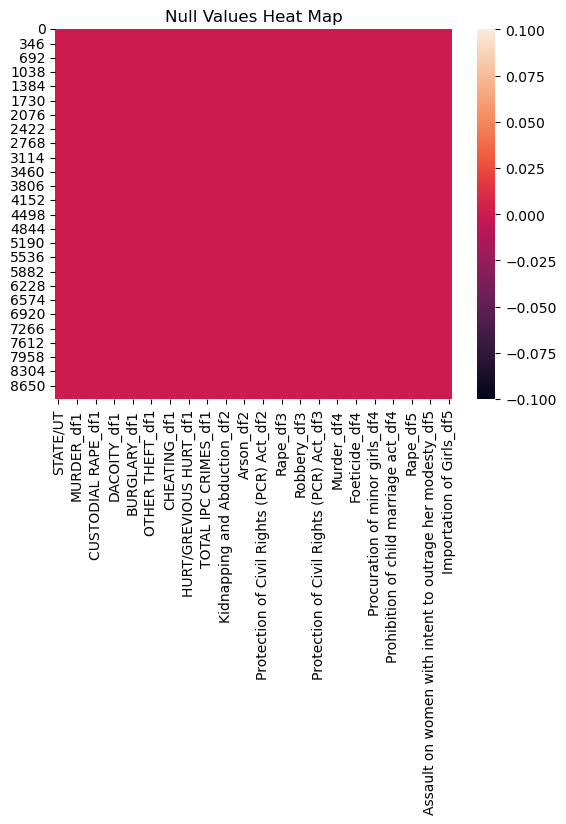

In [22]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm now that this **data frame does not contain null values.**

In [23]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

Total duplicate values present in DataFrame are 10.


In [24]:
#dropping duplicate values
df.drop_duplicates(inplace=True)

#re-checking for duplicate values present in data frame

dup(df)

This data frame does not contains duplicate values.


In [25]:
df.shape#checking shape of the data frame

(8963, 64)

Now the data frame has **8963 rows**.

## 4.1

In [26]:
#selecting appropriate columns for clustering
num_data=df.drop(['STATE/UT','DISTRICT'],axis=1)

In [27]:
#fitting K-Means to the data frame
kmeans=KMeans(n_clusters=3)#initializing KMeans 

clusters=kmeans.fit_predict(num_data)#fitting 

print(set(clusters))#printing clusters

{0, 1, 2}


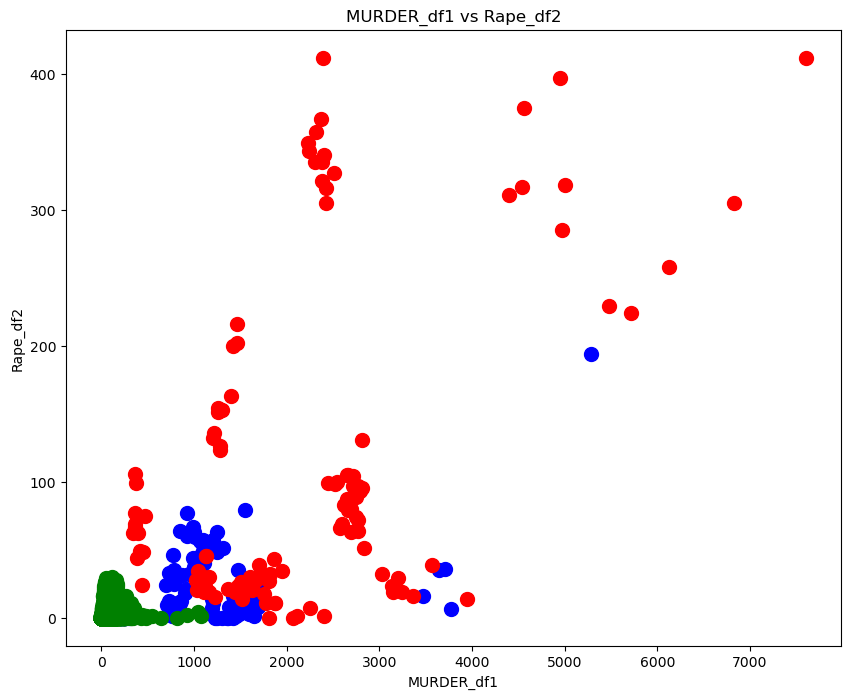

In [28]:
#Visualizing clusters

#Graph -1 
plt.figure(figsize=(10,8))
plt.scatter(num_data[clusters==0]['MURDER_df1'],num_data[clusters==0]['Rape_df2'],label='Cluster 0',c='blue',s=100)
plt.scatter(num_data[clusters==1]['MURDER_df1'],num_data[clusters==1]['Rape_df2'],label='Cluster 1',c='red',s=100)
plt.scatter(num_data[clusters==2]['MURDER_df1'],num_data[clusters==2]['Rape_df2'],label='Cluster 2',c='green',s=100)
plt.title('MURDER_df1 vs Rape_df2')
plt.xlabel('MURDER_df1')
plt.ylabel('Rape_df2')
plt.show()

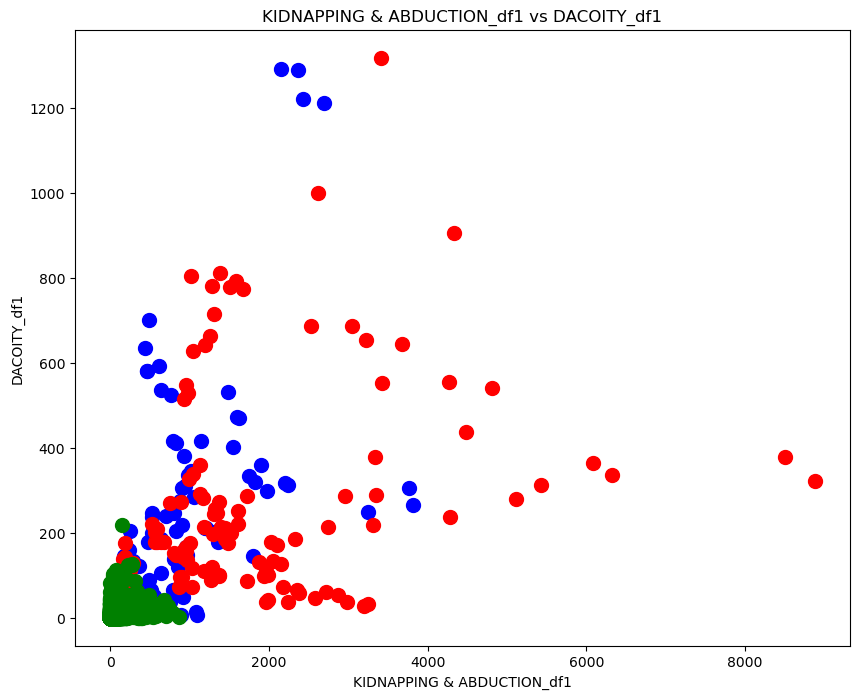

In [29]:
#Graph -2
plt.figure(figsize=(10,8))
plt.scatter(num_data[clusters==0]['KIDNAPPING & ABDUCTION_df1'],num_data[clusters==0]['DACOITY_df1'],label='Cluster 0',c='blue',s=100)
plt.scatter(num_data[clusters==1]['KIDNAPPING & ABDUCTION_df1'],num_data[clusters==1]['DACOITY_df1'],label='Cluster 1',c='red',s=100)
plt.scatter(num_data[clusters==2]['KIDNAPPING & ABDUCTION_df1'],num_data[clusters==2]['DACOITY_df1'],label='Cluster 2',c='green',s=100)
plt.title('KIDNAPPING & ABDUCTION_df1 vs DACOITY_df1')
plt.xlabel('KIDNAPPING & ABDUCTION_df1')
plt.ylabel('DACOITY_df1')
plt.show()

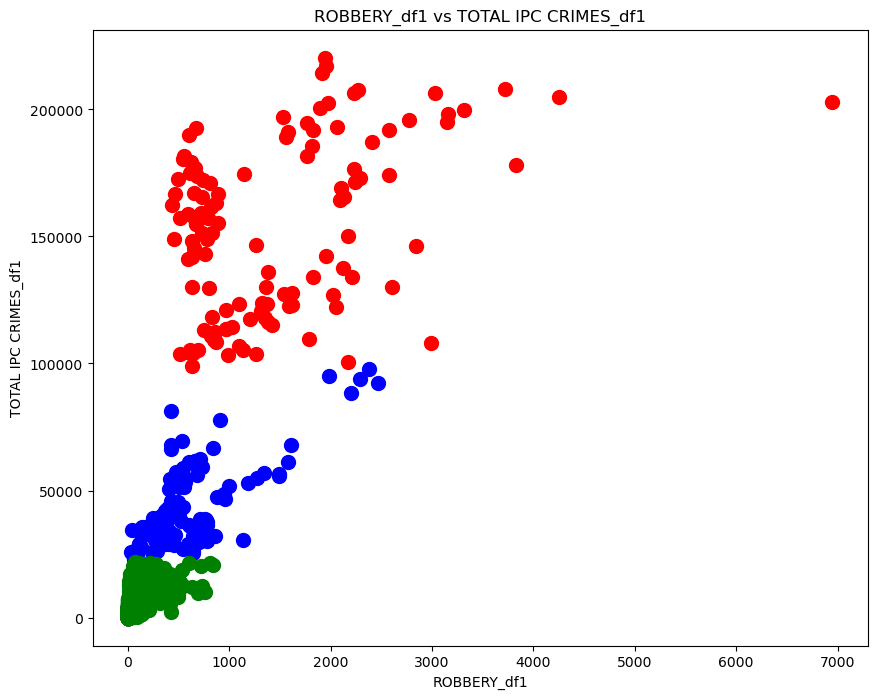

In [30]:
#Graph -3
plt.figure(figsize=(10,8))
plt.scatter(num_data[clusters==0]['ROBBERY_df1'],num_data[clusters==0]['TOTAL IPC CRIMES_df1'],label='Cluster 0',c='blue',s=100)
plt.scatter(num_data[clusters==1]['ROBBERY_df1'],num_data[clusters==1]['TOTAL IPC CRIMES_df1'],label='Cluster 1',c='red',s=100)
plt.scatter(num_data[clusters==2]['ROBBERY_df1'],num_data[clusters==2]['TOTAL IPC CRIMES_df1'],label='Cluster 2',c='green',s=100)
plt.title('ROBBERY_df1 vs TOTAL IPC CRIMES_df1')
plt.xlabel('ROBBERY_df1')
plt.ylabel('TOTAL IPC CRIMES_df1')
plt.show()

From the above graphs, we can conclude that:  
  
***Sensitive Areas - Cluster 1  
Moderate Areas - Cluster 2  
Peaceful Areas - Cluster 0***  

In [31]:
#creating a data frame according to Cluster 0
peaceful_areas=pd.DataFrame(data=df[clusters==0]).reset_index(drop=True)
peaceful_areas

,STATE/UT,DISTRICT,YEAR,MURDER_df1,ATTEMPT TO MURDER_df1,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_df1,CUSTODIAL RAPE_df1,KIDNAPPING & ABDUCTION_df1,KIDNAPPING AND ABDUCTION OF OTHERS_df1,DACOITY_df1,...,Prohibition of child marriage act_df4,Other Crimes_df4,Total_df4,Rape_df5,Kidnapping and Abduction_df5,Dowry Deaths_df5,Assault on women with intent to outrage her modesty_df5,Insult to modesty of Women_df5,Cruelty by Husband or his Relatives_df5,Importation of Girls_df5
0,ASSAM,TOTAL,2001,1356,481,40,0,1480,410,532,...,0.0,0.0,18,817,1070,59,850,4,1248,0
1,BIHAR,TOTAL,2001,3643,3419,250,0,2159,1641,1291,...,2.0,18.0,83,888,518,859,562,21,1558,83
2,HARYANA,TOTAL,2001,781,467,78,0,449,152,77,...,0.0,74.0,363,398,297,285,478,401,1513,0
3,JHARKHAND,TOTAL,2001,1507,866,143,0,441,162,636,...,0.0,20.0,41,567,279,217,297,5,484,2
4,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,0,152,96,31,...,0.0,1.0,6,40,56,40,223,51,229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,KARNATAKA,BANGALORE COMMR.,2012,266,454,6,0,532,99,37,...,2.0,62.0,551,90,433,51,321,51,524,0
108,MAHARASHTRA,MUMBAI COMMR.,2012,215,170,9,0,212,71,29,...,0.0,193.0,517,232,141,11,614,235,388,0
109,ODISHA,TOTAL,2012,1548,1879,54,0,1542,178,402,...,1.0,99.0,418,1458,1364,525,4187,304,2638,0
110,PUNJAB,TOTAL,2012,855,1045,104,1,919,230,48,...,0.0,33.0,877,680,689,118,340,31,1293,0


In [32]:
#creating a data frame according to Cluster 2
moderate_areas=pd.DataFrame(data=df[clusters==2]).reset_index(drop=True)
moderate_areas

,STATE/UT,DISTRICT,YEAR,MURDER_df1,ATTEMPT TO MURDER_df1,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_df1,CUSTODIAL RAPE_df1,KIDNAPPING & ABDUCTION_df1,KIDNAPPING AND ABDUCTION OF OTHERS_df1,DACOITY_df1,...,Prohibition of child marriage act_df4,Other Crimes_df4,Total_df4,Rape_df5,Kidnapping and Abduction_df5,Dowry Deaths_df5,Assault on women with intent to outrage her modesty_df5,Insult to modesty of Women_df5,Cruelty by Husband or his Relatives_df5,Importation of Girls_df5
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,0,46,16,9,...,0.0,0.0,0,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,0,53,23,8,...,0.0,0.0,66,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,0,59,25,4,...,0.0,0.0,0,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,0,25,5,1,...,0.0,0.0,0,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,0,49,23,4,...,0.0,0.0,0,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,1,0
8727,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,1,0
8728,PUDUCHERRY,KARAIKAL,2012,5,6,2,0,2,0,0,...,0.0,1.0,7,6,2,0,2,0,1,0
8729,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,0,17,3,5,...,1.0,2.0,25,7,14,0,7,2,5,0


In [33]:
#creating a data frame according to Cluster 1
sensitive_areas=pd.DataFrame(data=df[clusters==1]).reset_index(drop=True)
sensitive_areas

,STATE/UT,DISTRICT,YEAR,MURDER_df1,ATTEMPT TO MURDER_df1,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER_df1,CUSTODIAL RAPE_df1,KIDNAPPING & ABDUCTION_df1,KIDNAPPING AND ABDUCTION OF OTHERS_df1,DACOITY_df1,...,Prohibition of child marriage act_df4,Other Crimes_df4,Total_df4,Rape_df5,Kidnapping and Abduction_df5,Dowry Deaths_df5,Assault on women with intent to outrage her modesty_df5,Insult to modesty of Women_df5,Cruelty by Husband or his Relatives_df5,Importation of Girls_df5
0,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,0,1182,417,214,...,6.0,47.0,270,871,765,420,3544,2271,5791,7
1,GUJARAT,TOTAL,2001,1226,537,94,0,998,141,327,...,11.0,190.0,572,286,857,67,756,111,3667,0
2,KARNATAKA,TOTAL,2001,1626,1475,74,0,559,288,178,...,1.0,9.0,68,293,271,220,1665,81,1755,0
3,KERALA,TOTAL,2001,472,615,111,0,183,86,176,...,3.0,63.0,247,562,97,27,1942,81,2561,0
4,MADHYA PRADESH,TOTAL,2001,2425,2870,125,0,956,288,166,...,4.0,740.0,1425,2851,668,609,7063,751,2562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,MAHARASHTRA,TOTAL,2012,2712,2168,171,0,1583,443,793,...,6.0,1157.0,3456,1839,1140,329,3935,1294,7415,0
116,RAJASTHAN,TOTAL,2012,1461,1538,98,0,3243,546,31,...,10.0,87.0,1807,2049,2697,478,2352,18,13312,0
117,TAMIL NADU,TOTAL,2012,1949,2954,44,0,1945,252,97,...,0.0,40.0,1036,737,1693,110,1494,382,1965,0
118,UTTAR PRADESH,TOTAL,2012,4966,4811,1410,0,8878,968,322,...,5.0,196.0,6033,1963,7910,2244,3247,8,7661,0


## 4.3

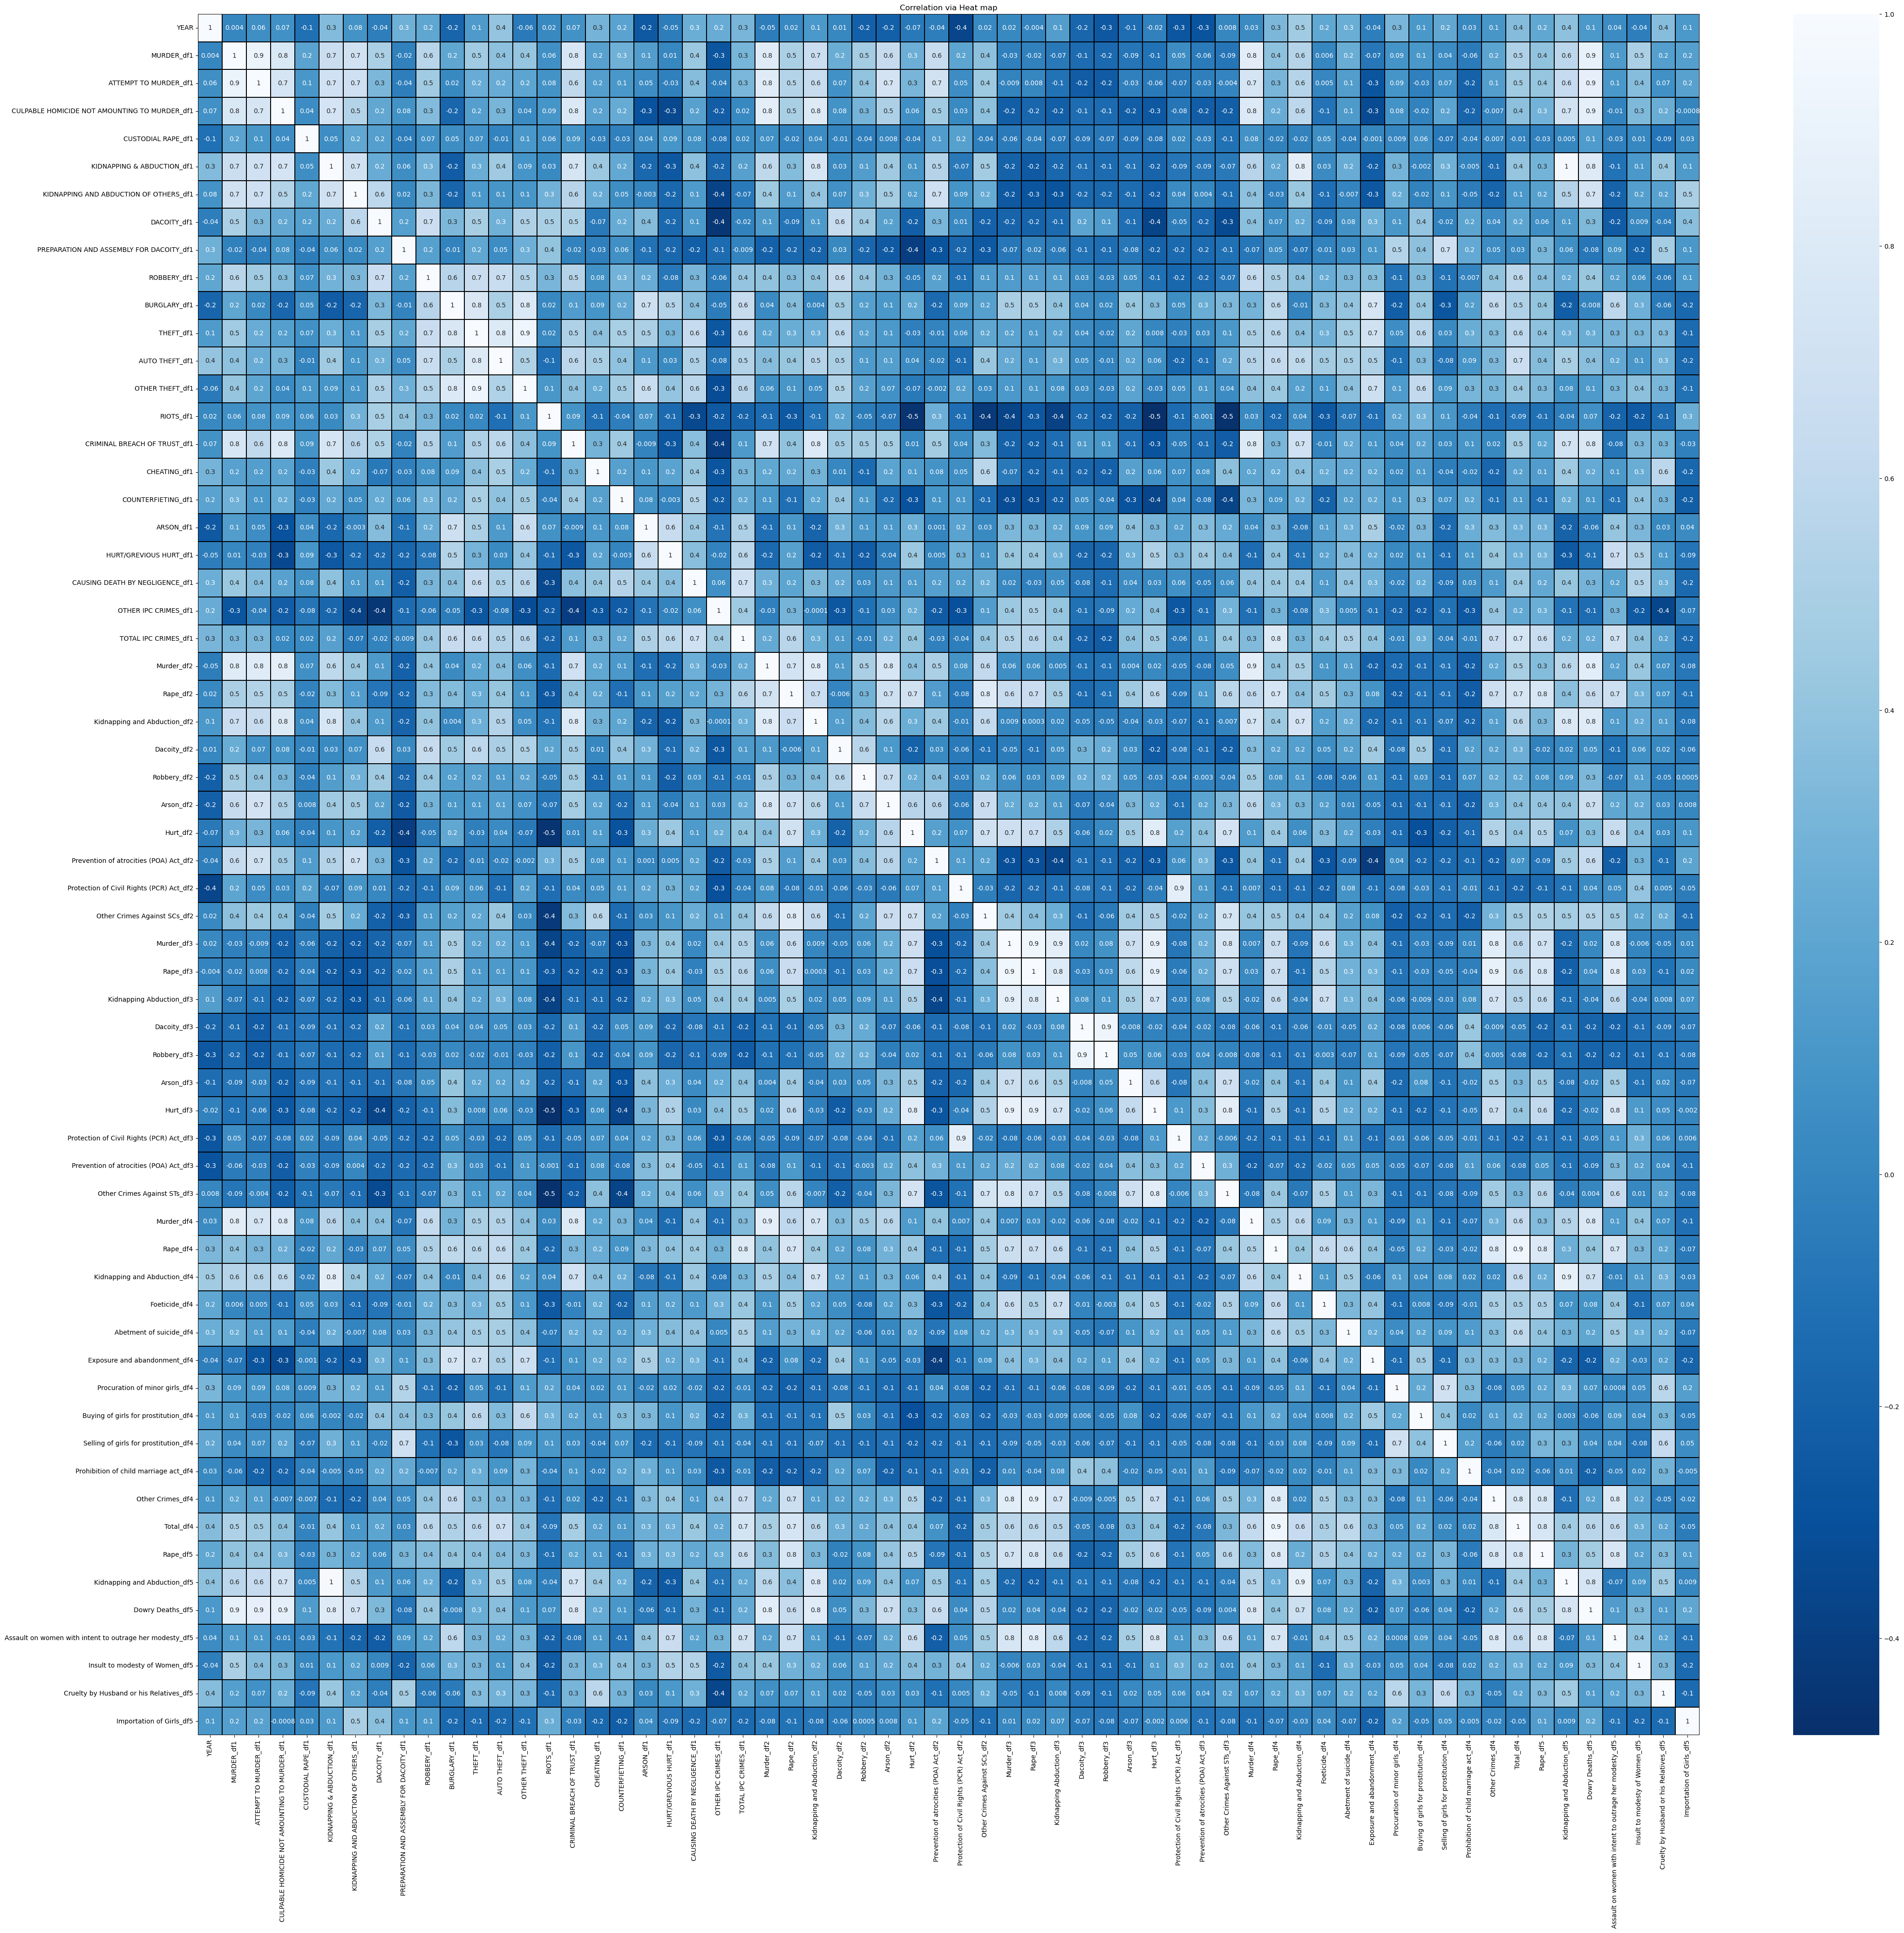

In [34]:
#Visualizing correlation of sensative area  via heat map
cor_sensative=sensitive_areas.corr()
plt.figure(figsize=(52,48))
sb.heatmap(cor_sensative,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

As we can observe, the **'Rape_df4'** column shows a **high positive correlation** with **'TOTAL IPC CRIMES_df1.'** column, thus, **all crimes** related to **'Rape'** are **contributing** to the prevalence of crime in these **sensitive areas**.

In [35]:
#Sensitive Area

_index=sensitive_areas['TOTAL IPC CRIMES_df1'].idxmax()#fetching index of max value present in 'TOTAL IPC CRIMES_df1' column
sensitive_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'MADHYA PRADESH'

**'MADHYA PRADESH'** is the most **unsafe** area.

In [36]:
sensitive_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the index

2012

In year **2012**, the **crimes were the highest**.

In [37]:
_index=sensitive_areas['TOTAL IPC CRIMES_df1'].idxmin()#fetching index of minimum value present in 'TOTAL IPC CRIMES_df1' column
sensitive_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'KERALA'

**'KERALA'** is the most **safe** area.

In [38]:
sensitive_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the index

2003

In year **2003**, the **crimes were the lowest**.

In [39]:
#Moderate area

_index=moderate_areas['TOTAL IPC CRIMES_df1'].idxmax()#fetching index of max value present in 'TOTAL IPC CRIMES_df1' column
moderate_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'JAMMU & KASHMIR'

**'JAMMU & KASHMIR'** is the most **unsafe** area.

In [40]:
moderate_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the index

2009

In year **2009**, the **crimes were the highest**.

In [41]:
_index=moderate_areas['TOTAL IPC CRIMES_df1'].idxmin()#fetching index of minimum value present in 'TOTAL IPC CRIMES_df1' column
moderate_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'DELHI'

**'DELHI'** is the most **safe** area.

In [42]:
moderate_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the index

2001

In year **2001**, the **crimes were the lowest**.

In [43]:
#Peacful area

_index=peaceful_areas['TOTAL IPC CRIMES_df1'].idxmax()#fetching index of max value present in 'TOTAL IPC CRIMES_df1' column
peaceful_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'BIHAR'

**'BIHAR'** is the most **unsafe** area.

In [44]:
peaceful_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the index

2005

In year **2005**, the **crimes were the highest**.

In [45]:
_index=peaceful_areas['TOTAL IPC CRIMES_df1'].idxmin()#fetching index of minimum value present in 'TOTAL IPC CRIMES_df1' column
peaceful_areas.loc[_index,'STATE/UT']#fetching value of 'STATE/UT' column based on the index

'JAMMU & KASHMIR'

**'JAMMU & KASHMIR'** is the most **safe** area.

In [46]:
peaceful_areas.loc[_index,'YEAR']#fetching value of 'YEAR' column based on the inde

2010

In year **2010**, the **crimes were the lowest**.

# 4.4

**Phase 1: Data Gathering**
  
In Phase 1 of the India Crime Capstone Project, my focus was on assembling a comprehensive dataset to lay the foundation for the subsequent analyses. The data compilation process involved gathering information from diverse sources to ensure a holistic understanding of the crime landscape in India.**  
  
The dataset encompassed key demographic indicators, such as population and area, for each state in the country. This information served as crucial contextual factors, providing insights into the socio-economic and geographical dimensions that could potentially influence crime patterns. Additionally, literacy rates were included, shedding light on the educational landscape of each state.  
  
Crime-related metrics constituted a significant portion of the dataset, with a detailed  breakdown of crime rates and total IPC (Indian Penal Code) crimes for each state. This comprehensive approach allowed for a nuanced exploration of crime trends, going beyond mere aggregate figures. The types of crimes were also categorized, offering a detailed look into the diverse nature of offenses prevalent in different regions.  
  
By integrating these various data points, Phase 1 laid the groundwork for subsequent in-depth analyses. The goal was to not only identify patterns in crime rates but also to understand the potential correlations between demographic factors, literacy rates, and the prevalence of specific types of crimes. This holistic dataset forms the backbone of the entire capstone project, enabling a multi-faceted examination of the complex interplay between demographic, socio-economic, and crime-related variables across different states in India.  
  
Moving forward, this robust dataset will serve as a valuable resource for the subsequent phases, providing a solid foundation for informed insights and data-driven decision-making in addressing and understanding crime dynamics in India.  
  
**Phase 2: Data Analysis**  
  
In Phase 2 of the India Crime Capstone Project, my focus shifted towards conducting a comprehensive analysis of the collected data. The objective was to unearth meaningful insights by examining the relationships between various factors and crime dynamics across different states. 
  
The first facet of the analysis delved into the connection between Literacy Rate and Total Crime. I aimed to discern any discernible patterns or correlations, shedding light on the potential influence of education levels on overall crime rates.  
  
Additionally, I explored the relationship between the types of crimes and each state's Literacy Rate. This nuanced approach allowed for a more granular understanding of how education might impact the prevalence of specific crimes in different regions.  
  
Year-on-year total crime rate analysis provided a temporal dimension, enabling the identification of trends and fluctuations in overall crime rates over time. This temporal perspective is crucial for understanding the evolving nature of crime patterns.  
  
Examining the correlation between a state's geographical area and its overall crime rate was another key aspect of Phase 2. This analysis aimed to uncover any spatial dimensions to crime prevalence, offering insights into whether certain types of crimes were more prevalent in specific geographic regions.  
  
Population dynamics were also brought into focus by assessing their relationship with overall crime rates. This analysis aimed to determine whether densely populated states exhibited different crime patterns compared to less populated ones.  
  
A significant outcome of Phase 2 was the creation of detailed crime reports for each state. These reports encapsulated the findings of the various analyses, providing a state-specific perspective on the interplay between literacy rates, population, geography, and crime.  
  
**Phase 3:SQL Operations and Data Manipulation**
  
In the dynamic Phase 3 of the India Crime Capstone Project, my focus transitioned to leveraging the power of SQL operations using SQLite 3, unveiling crucial insights into specific crime categories. This phase not only involved the extraction of relevant data but also the strategic organization and analysis to draw meaningful conclusions.  
  
The initial SQL operations comprised the insertion of records into the database, laying the groundwork for subsequent analyses. A spotlight was placed on the highest and lowest occurrences of rapes, kidnappings, dacoities/robberies, and murders, bringing attention to the specific states, districts, and years in which these incidents unfolded. 
  
Particularly, identifying districts with the highest number of murders in ascending order, and the district with the highest murder count yearwise within each state/union territory, provided a nuanced understanding of the spatial and temporal dynamics of violent crimes. 
  
The subsequent step involved the translation of this data into a comprehensible format by storing it in a data frame. This not only facilitated ease of analysis but also set the stage for visually impactful representations through appropriate graphs.  
  
A significant analytical component was identifying districts that consistently appeared for three or more years in the dataset. This strategic approach aimed to uncover patterns and hotspots of recurring criminal activity, offering valuable insights for targeted interventions.  
  
The synthesis of this information allowed for the creation of visually intuitive graphs, illustrating trends and patterns in crime data. Whether it was understanding the ebb and flow of specific crimes over the years or pinpointing districts with persistent challenges, the graphs served as powerful tools for communication and decision-making.  
  
**Phase 4: Cluster Analysis and Insights Generation**
    
In the culminating Phase 4 of the India Crime Capstone Project, the focus shifted to the strategic creation of clusters to unveil distinct patterns and characteristics within the dataset. The primary objective was to categorize geographical areas based on crime data, leading to the identification of "Sensitive Areas," "Moderate Areas," and "Peaceful Areas."  
  
The process began with the formation of three distinct clusters, each representing a different level of crime intensity. "Sensitive Areas" encapsulated regions with higher crime rates, requiring focused attention and intervention. "Moderate Areas" represented locales with a moderate level of criminal activity, while "Peaceful Areas" denoted regions characterized by lower crime rates.  
  
To facilitate a more comprehensive analysis, dedicated data frames were created for each cluster. This organizational structure allowed for a focused examination of crime trends, demographics, and other relevant factors within each identified category.  
  
Analyzing these clusters provided a nuanced understanding of the variations in crime dynamics across different areas. For "Sensitive Areas," the focus was on identifying root causes and formulating targeted strategies to address the heightened crime rates. "Moderate Areas" offered an opportunity to explore factors contributing to moderate crime levels and implement preventative measures. Meanwhile, "Peaceful Areas" provided insights into successful practices that contribute to lower crime rates.  
  
***In summary, the India Crime Capstone Project delved into the intricacies of crime data, uncovering patterns and solutions. This comprehensive analysis lays the foundation for informed strategies, contributing to a safer and more secure future for communities across the nation.***